# nmi | spring 2024
## lecture 15 : systems of ODEs


### 6.3 systems of ordinary differential equations


x matrices, surprise. eg, a first order system
</br></br>

\begin{align}
  y_1' &= f_1(t,y_1,\dots,y_n) \\
  y_2' &= f_1(t,y_1,\dots,y_n) \\
  &\quad\vdots \\
  y_n' &= f_1(t,y_1,\dots,y_n).
\end{align}
</br>


##### example 13


apply eulers to a system of first order equations for $t \in [0,1]$.
</br></br>

\begin{align}
  \text{example 13}\quad
  \left\{ \quad
    \begin{array}{l}
      y_1' = y_2^2 - 2y_1 &\quad y_2' = y_1 - y_2 - ty_2^2 \\
      y_1(0) = 0 &\quad y_2(0) = 1
    \end{array}
  \right.
\end{align}
</br>

with true solutions $y_1(t) = te{-2t}$ and $y_2(t) = e^{-t}$ and approximations
</br></br>

\begin{align}
  w_{i+1,1} &= w_{i,1} + h(w_{i,2}^2 - 2w_{i,1}) \\
  w_{i+1,2} &= w_{i,2} + h(w_{i,1} - w_{i,2} - t_iw_{i,2}^2).
\end{align}
</br>


###### code

,t,w1,y1,w2,y2
0,0.0,0.000000,0.000000,1.000000,1.000000
1,0.1,0.100000,0.081873,0.900000,0.904837
2,0.2,0.161000,0.134064,0.811900,0.818731
3,0.3,0.194718,0.164643,0.733626,0.740818
4,0.4,0.209595,0.179732,0.663589,0.670320
5,0.5,0.211711,0.183940,0.600576,0.606531
6,0.6,0.205438,0.180717,0.543655,0.548812
7,0.7,0.193907,0.172618,0.492100,0.496585
8,0.8,0.179341,0.161517,0.445329,0.449329
9,0.9,0.163305,0.148769,0.402865,0.406570


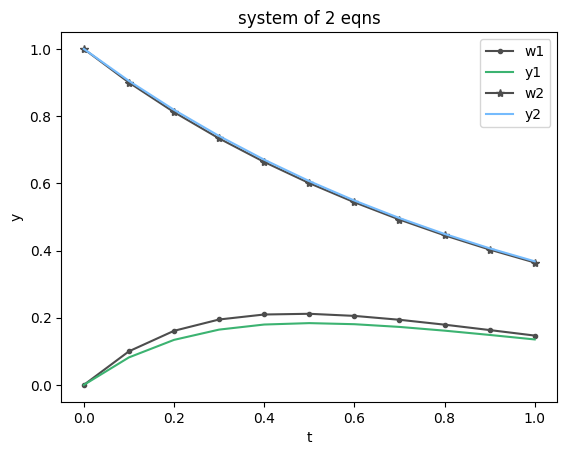

In [ ]:
# eg 13 : lucky

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# euler
euler_step = lambda t,y,h,ydot: y + h*ydot(t,y)

# f(t,y)
def ydot(at,ay):
  z = np.zeros(ay.shape)
  z[0] = pow(ay[1],2) - 2*ay[0]
  z[1] = ay[0] - ay[1] - at*pow(ay[1],2)
  return z

# actual
y1 = lambda t: t*np.exp(-2*t)
y2 = lambda t: np.exp(-t)
ys = [y1,y2]
n_sys = len(ys)

# interval, h
t = [0.,1.]
n = 10 # [0,n] points
h = (t[1]-t[0])/n

# ic
t1 = t2 = t[0]
w1 = ic = np.array([0.,1.]) # y0

# ic, dataframe
ds = np.zeros((n+1,1+2*n_sys)) # t,[w,y]*n_sys
ds[0,0] = t1
for j in range(n_sys):
  ds[0,2*j+1] = ic[j] # w
  ds[0,2*j+2] = ic[j] # y

# calc
for i in range(n):
  t2 += h
  ds[i+1,0] = t2
  w2 = euler_step(t1,w1,h,ydot)
  for j in range(len(w2)):
    ds[i+1,2*j+1] = w2[j]
    ds[i+1,2*j+2] = ys[j](t2)
  t1 = t2
  w1 = w2

# dataframe column names
nCol = ['t']
for i in range(n_sys):
  nCol.append('w'+str(i+1))
  nCol.append('y'+str(i+1))

# dataframe from datastore
df = pd.DataFrame(data=ds,columns=nCol)
if True: # spreadsheet
  display(df)

if True: # plot
  ax1  = df.plot(x = "t",y="w1",label="w1",color=".3",marker=".")
  ax11 = df.plot(x = "t",y="y1",label="y1",ax=ax1,color="mediumseagreen")
  ax12 = df.plot(x = "t",y="w2",label="w2",ax=ax1,color=".3",marker="*")
  ax13 = df.plot(x = "t",y="y2",label="y2",ax=ax1,color="xkcd:sky blue")
  ax1.set_title("system of 2 eqns")
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")

#### 6.3.1 higher order

given
</br></br>

\begin{matrix}
  y^{(n)} = f(t,y,y',y'',\dots,y^{(n-1)} \\
  \Downarrow \\
  y_1 = y && y_1' = y2\\
  y_2 = y' &\Rightarrow & y_2' = y_3 \\
  \vdots && \vdots\\
  y_n = y^{(n-1)} && y_{n-1}' = y_n \\
  &&\quad\Downarrow \\
  && y_n' = f(t,y_1,y_2,y_3,\dots,y_n)
\end{matrix}
</br>


##### example 14


\begin{align}
  y''' &= a(y'')^2 - y' + yy'' + sint \\
  &\Downarrow \\
  y_1 &= y \\
  y_2 &= y' \\
  y_3 &= y'' \\
  &\Downarrow \\
  y_1' &= y_2 \\
  y_2' &= y_3 \\
  y_3' &= ay_3^2 - y_2 + y_1 y_3 + sint
\end{align}
</br>

ie, solve $\{ y_1(t),y_2(t),y_3(t) \}$. ie, solve an order three differential equation with order one method.
</br>


#### 6.3.2 computer sim: pendulum


assume a pendulum bob hangs from a rigid support of length $l$ with $2\pi$ radians of motion. $y$ is the angle and $0$ is in the direction of the negative $y$-axis - ie, where it would be if bob were at rest. from newtons second law of motion $F=ma$ and tangential acceleration is $ly''$. bc elementary physics got involved, this is a frictionless system. ie, with gravity as the influencer,
</br></br>

$$m\cdot ly'' = F = - m\cdot gsiny.$$
</br>


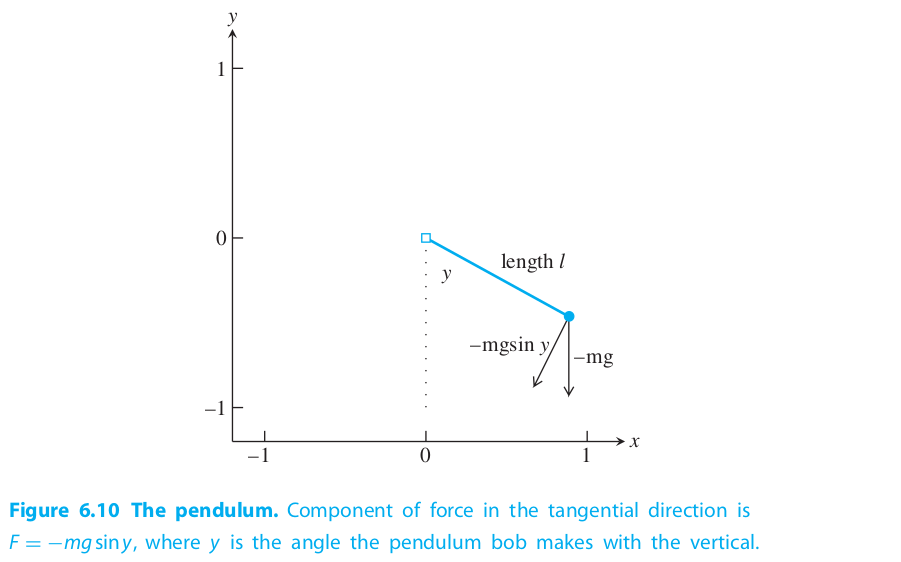

define $y_1 = y$ and $y_2 = y'$ and now its magically a first-order system.
</br></br>

\begin{align}
  \text{magic}\quad
  \left\{ \quad
    \begin{array}{l}
      y_1' &= y_2 \\
      y_2' &= -\frac{g}{l}sin y_1
    \end{array}
  \right.
\end{align}
</br>


note: this system is autonomous bc no $t$ exists in these equations. also, the acceleration of gravity is $9.81 mps$ in case you were trying to forget.
</br></br>

so if the initial position of bob is held straight out to the right, the initial conditions are $y_1(0) = \frac{\pi}{2}$ and $y_2(0) = 0$.
</br>


###### code, convergence -- eulers method vs heuns (explicit trapezoid)

,t,theta,v_ang
0,0.0,1.570796,0.000000
1,0.1,1.521767,-0.980430
2,0.2,1.374911,-1.953811
3,0.3,1.132319,-2.885618
4,0.4,0.801837,-3.692984
...,...,...,...
96,9.6,1.491341,-1.248675
97,9.7,1.317880,-2.215889
98,9.8,1.050047,-3.124148
99,9.9,0.698154,-3.876335


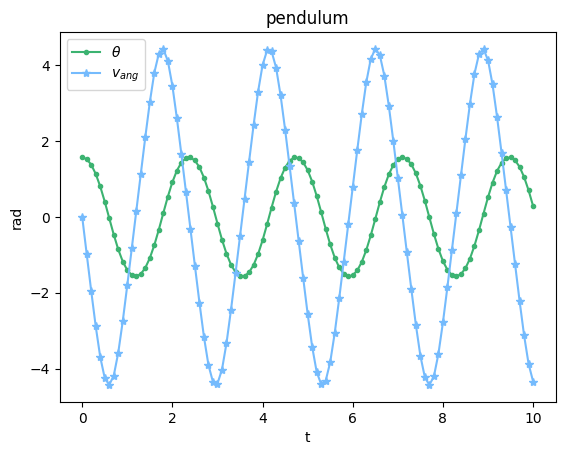

In [ ]:
# 6.3.2 : pendulum

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import constants

# euler
euler_step = lambda t,y,h,ydot: y + h*ydot(t,y)

# trapezoid
def trap_step(t,x,h,ydot):
  z1 = ydot(t,x)
  g = x+h*z1
  z2 = ydot(t+h,g)
  y = x+h*(z1+z2)/2
  return y

# f(t,y)
def ydot(at,ay):
  z = np.zeros(ay.shape)
  z[0] = ay[1]
  z[1] = -constants.kgf*math.sin(ay[0]) # length = 1
  return z

# interval, h
t = [0.,10.]
h = 0.01
n = round((t[1]-t[0])/h) # evaluate n
p = 100                  # plot p

# ic
t1 = t2 = t[0]
w1 = w2 = ic = np.array([np.pi/2,0],dtype=float)
n_sys = ic.size

# ic, dataframe
ds = np.zeros((p+1,1+n_sys)) # p,n_sys
ds[0,0] = t1
ds[0,1:(len(ic)+1)] = ic

# calc
for k in range(round(p)):
  for i in range(round(n/p)):
    t2 += h
    #w2 = euler_step(t1,w1,h,ydot) # less stable
    w2 = trap_step(t1,w1,h,ydot)  # more stable
    t1,w1 = t2,w2
  ds[k+1,0] = t2
  ds[k+1,1:1+n_sys] = w2


# dataframe column names
nCol = ['t','theta','v_ang']

# dataframe from datastore
df = pd.DataFrame(data=ds,columns=nCol)
if True: # spreadsheet
  display(df)

if True: # plot
  ax1  = df.plot(x = "t",y="theta",label="$\\theta$",color="mediumseagreen",marker=".")
  ax11 = df.plot(x = "t",y="v_ang",label="$v_{ang}$",ax=ax1,color="xkcd:sky blue",marker="*")
  ax1.set_title("pendulum")
  ax1.set_xlabel("t")
  ax1.set_ylabel("rad")


thats showing some instability. switch to trapezoid method and see what haps.
</br>


double pendulum [@matplotlib](https://matplotlib.org/stable/gallery/animation/double_pendulum.html)

###### code, stolen animation that needs more love to run on colab


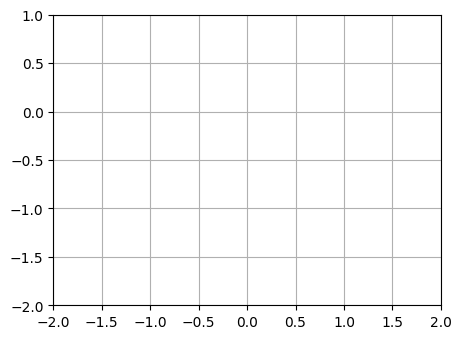

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin

import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 2.5  # how many seconds to simulate
history_len = 500  # how many trajectory points to display


def derivs(t, state):
    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.01
t = np.arange(0, t_stop, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate the ODE using Euler's method
y = np.empty((len(t), 4))
y[0] = state
for i in range(1, len(t)):
    y[i] = y[i - 1] + derivs(t[i - 1], y[i - 1]) * dt

# A more accurate estimate could be obtained e.g. using scipy:
#
#   y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state, t_eval=t).y.T

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    history_x = x2[:i]
    history_y = y2[:i]

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    #return line, trace, time_text
    return (line,trace,time_text)


ani = animation.FuncAnimation(fig,animate,len(y),interval=dt*1000) #,blit=True,repeat=False)
plt.show()

#plt.rcParams["animation.html"] = "jshtml"
#plt.rcParams['figure.dpi'] = 150


##### usw: egs related to homework possibly

##### example 15


the damped pendulum, which approaches limiting equilibrium $y_1 = y_2 = 0$. ie, maybe add some random friction.
</br></br>

\begin{align}
  \text{example 15}\quad
  \left\{ \quad
    \begin{array}{l}
      y'_1 &= y_2 \\
      y'_2 &= \frac{g}{l}sin y_1 - dy_2 \quad\text{damping coefficient, } d> 0    \end{array}
  \right.
\end{align}
</br>


##### example 16


the forced damped pendulum, with an outside force on a damped pendulum. eg, a sinusoidal term $Asint$ added to $y_2'$.
</br></br>

\begin{align}
  \text{example 16}\quad
  \left\{ \quad
    \begin{array}{l}
      y'_1 &= y_2 \\
      y'_2 &= \frac{g}{l}sin y_1 - dy_2 + Asint
    \end{array}
  \right.
\end{align}
</br>


##### example 17


the double pendulum, where the angles are, awkwardly, $y_1$ and $y_3$, and, conveniently, both lengths $l=1$. ie, another bob hanging from bob.
</br></br>

\begin{align}
  \text{example 17}\quad
  \left\{ \quad
    \begin{array}{l}
      y'_1 &= y_2 \\
      y'_2 &= \frac{-3gsiny_1 - gsin(y_1-2y_3) - 2sin(y_1-y_3)(y_4^2 - y_2^2cos(y_1-y_3))}{3-cos(2y_1 - 2y_3)} - dy_2 \\
      y'_3 &= y_4 \\
      y'_4 &= \frac{2sin(y_1-y_3)[2y_2^2 + 2gcosy_1 + y_4^2cos(y_1-y_3)]}{3-cos(2y_1 - 2y_3)}
    \end{array}
  \right.
\end{align}
</br>


* animation [@youtube](https://www.youtube.com/watch?v=bXxCxhZCCUA)


#### 6.3.3 computer sim: orbital mechanics


the law of gravitation expresses the force on mass $m_1$ from mass $m_2$ with an inverse-square law
</br></br>

$$F = \frac{gm_1m_2}{r^2}$$
</br>

where $r$ is the distance between $m_1$ and $m_2$. if one mass is neglible compared to the other, its a <b>one-body problem</b>. ie, ignore the effect of the satellite on the planet.
</br></br>

with the large mass centered at origin and the satellite at $(x,y)$ and radius $r = \sqrt{x^2+y^2}$ and force on satellite is central (towards origin). the unit direction vector is
</br></br>

$$\left( -\frac{x}{\sqrt{x^2+y^2}},-\frac{y}{\sqrt{x^2+y^2}} \right).$$
</br>

in components
</br></br>

$$(F_x,F_y) = \left(\frac{gm_1m_2}{x^2+y^2}\cdot\frac{-x}{\sqrt{x^2+y^2}},\frac{gm_1m_2}{x^2+y^2}\cdot\frac{-y}{\sqrt{x^2+y^2}} \right).$$
</br>

using newtons second law of motion yields two second-order equations that will become four first-order equations.
</br></br>

\begin{align}
  m_1x'' &= \frac{-gm_1m_2x}{(x^2+y^2)^{\frac{3}{2}}} \\
  m_2y'' &= \frac{-gm_1m_2y}{(x^2+y^2)^{\frac{3}{2}}} \\
  \\
  &\quad\Downarrow \\
  \\
  x' &= v_x \\
  v_x' &= -\frac{gm_2x}{(x^2+y^2)^{\frac{3}{2}}} \\
  y' &= v_y \\
  v_y' &= -\frac{gm_2y}{(x^2+y^2)^{\frac{3}{2}}}.
\end{align}
</br>


##### code

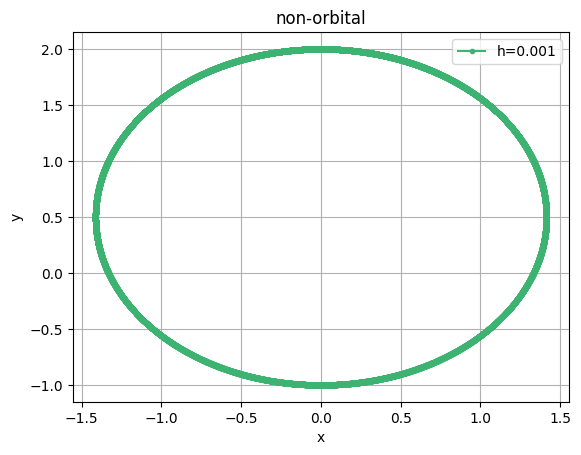

In [ ]:
# 6.3.3 : not even close to outer space

#from astropy.constants import M_earth,g0 as EARTH,GRAVITY # metric
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# euler
euler_step = lambda t,x,h,ydot: x + h*ydot(t,x)

# trapezoid
def trap_step(t,x,h,ydot):
  z1 = ydot(t,x)
  g = x+h*z1
  z2 = ydot(t+h,g)
  y = x+h*(z1+z2)/2
  return y

# f(t,y)
def ydot(at,ax):
  #m2,g,px2,py2 = EARTH,GRAVITY,0,0 # and the center of the earth
  m2,g,px2,py2 = 3.,1.,0.,0. # sauer, 2nd ed, p329
  z = np.zeros(ax.shape)

  px1,py1 = ax[0],ax[2] # position
  vx1,vy1 = ax[1],ax[3] # velocity

  z[0],z[2] = vx1,vy1
  r = math.sqrt(pow((px2-px1),2) + pow((py2-py1),2))
  m = m2*g/pow(r,3)
  if False:
    print(f"m2 {m2}, g {g}, r {r}, m {m}")
  z[1],z[3] = m*(px2-px1),m*(py2-py1)

  return z

# interval, h
t = [0.,100.]
#n,p = 10000,100 # evaluate n, plot p # tmi!
n,p = 100000,20000 # evaluate n, plot p
h = (t[1]-t[0])/n

# ic
t1 = t2 = t[0]
y1 = y2 = ic = np.array([0.,1.,2.,0.])

# ic, dataframe
ds = np.zeros((p+1,1+len(ic)))
ds[0,1:len(y1)+1] = y1

# calc
for k in range(p):
  for i in range(round(n/p)): # round = lols
    t2 += h
    #y2 = euler_step(t1,y1,h,ydot)
    y2 = trap_step(t1,y1,h,ydot)
    t1,y1 = t2,y2
  ds[k+1,0] = t2
  ds[k+1,1:len(y2)+1] = y2

# plot
nCol = ['t','x',"x'",'y',"y'"] # dataframe column names
df = pd.DataFrame(data=ds,columns=nCol)

if False: # spreadsheet
  display(df)

if True: # plot
  ax1  = df.plot(x = "x",y="y",label="h="+str(h),color="mediumseagreen",marker=".")
  #ax1a = df.plot(x = "x'",y="y'",label="$v_{wtf}$",ax=ax1,color="xkcd:sky blue",marker="*")
  ax1.set_title("non-orbital")
  ax1.set_xlabel("x")
  ax1.set_ylabel("y")
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')


so that satellite got flung into outer space. you might say, but its more-like, eulers wasnt good enough with that step size and now some one has to stalk it with apple airtags. try it with a smaller $h$. or better yet, try a different solver.